Noah Kasmanoff

nsk367@nyu.edu

Notebook workspace for questions in homework 1, will convert answers into py files and move to src once confident in their results. 

1) Differentiate the functions cos(x) and exp(x) at x = 0.1, 10 using single precision
    forward-, central- and extrapolated-difference algorithms.

    a) Write a code that implements these three methods.
    
    b) Make a log-log plot of the relative error ε vs step size h and check whether
    the scaling and the number of significant digits obtained agrees with
    simple estimates.
    
    c) Truncation and roundoff error manifest themselves in different regimes in
    these plots. Clearly identify these regimes.

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('husl')


In [70]:
Pk = pd.read_csv('../dat/lcdm_z0.matter_pk',delimiter=' ',names=['k','P(k)','idk1',
                                                                'idk2'],header=None)

Pk = Pk[Pk.columns[0:2]]

In [72]:
Pk

,k,P(k)
0,0.000100,651.342300
1,0.000102,665.741300
2,0.000105,680.458400
3,0.000107,695.500400
4,0.000110,710.874700
5,0.000112,726.588500
6,0.000115,742.649300
7,0.000117,759.064700
8,0.000120,775.842600
9,0.000123,792.990900


For now, let's assume that's the correct ordering and columns. Pk[0] -> k values, Pk[1] -> P values. 

 1e4 / 1e6

Units??


0th order Bessel function used? 




In [73]:
def integrate(f,a,b,N):

    h = (b - a) / (N)
        
    s = f(a) + f(b) + 4*f(b-h)
    for k in range(1,N//2):
        s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    I_simpson = (h/3)*s  #   expected error ~h^4
        

    return I_simpson
    

In [77]:
from scipy import interpolate

In [78]:
interpolate.CubicSpline(x)

x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
>>> xs = np.arange(-0.5, 9.6, 0.1)
>>> fig, ax = plt.subplots(figsize=(6.5, 4))
>>> ax.plot(x, y, 'o', label='data')
>>> ax.plot(xs, np.sin(xs), label='true')

<module 'scipy.interpolate' from '/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/interpolate/__init__.py'>

In [79]:
cs = interpolate.CubicSpline(Pk['k'],Pk['Integrand'])

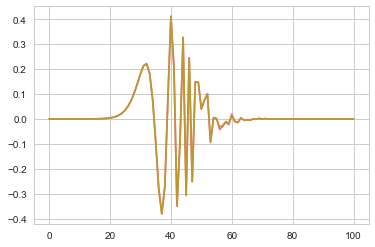

In [85]:
plt.plot(cs(10**np.linspace(-3.99,2.99,101)))
plt.plot(integrand_F(10**np.linspace(-3.99,2.99,101)))

#cubic spline performs slightly better!

0.024787071209281964

In [91]:
#cubic spline everything
corrs = []
rs = np.linspace(50,120,21)
for r in rs:
    Pk['Integrand'] = Pk['k'] * Pk['P(k)'] * np.sin(Pk['k'] * r)  / ( r * 2* np.pi * np.pi)
    integrand_F = lambda x: np.interp(x,Pk['k'],Pk['Integrand'])
    cs = interpolate.CubicSpline(Pk['k'],Pk['Integrand'])
    integrand_F = lambda x: cs(x) 
    integral = integrate(f=integrand_F,a = 1, b = 9,N=int(1e5))
    corrs.append(integral)

In [121]:
corrs = []
rs = np.linspace(50,120,21)
for r in rs:
    Pk['Integrand'] = Pk['k'] * Pk['P(k)'] * np.sin(Pk['k'] * r)  / ( r)
    #integrand_F = lambda x: np.interp(x,Pk['k'],Pk['Integrand'])
   # integral = integrate(f=integrand_F,a = 1, b = 9,N=int(1e5))
    #corrs.append(integral)

In [138]:
np.linspace(2,120,121//2)

array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,
        46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,
        68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,
        90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108., 110.,
       112., 114., 116., 118., 120.])

In [154]:
#cubic spline pk, then multiply 

corrs = []
rs = np.linspace(2,120,121)
for r in rs:
    cs = interpolate.CubicSpline(x=Pk['k'],y=Pk['P(k)'])
    f3 = lambda k: ((k*k*cs(k)*np.sin(k*r)) / (k*r))
    integral = integrate(f = f3,a = min(Pk['k'])+.00001, b = max(Pk['k']) - .00001 , N=int(1e5)) / (2*np.pi**2)#THIS WAS ITTT!!
    corrs.append(integral)
    
    print(r,integral)


2.0 4.292992696067096
2.9833333333333334 2.8047736200954754
3.966666666666667 2.0086334618404025
4.949999999999999 1.5181141964123241
5.933333333333334 1.1892841274706885
6.916666666666666 0.9560109152013931
7.8999999999999995 0.7836511382700885
8.883333333333333 0.6523135601165619
9.866666666666667 0.5497914247481538
10.85 0.468187380846948
11.833333333333332 0.4021842557544298
12.816666666666666 0.3480742070749989
13.799999999999999 0.30320290962134283
14.783333333333333 0.26562102751860445
15.766666666666666 0.23387189254758756
16.75 0.20684399681852944
17.733333333333334 0.18367942083961994
18.716666666666665 0.163704495914967
19.7 0.1463862474999483
20.683333333333334 0.1312960920514376
21.666666666666664 0.11808834807880722
22.65 0.10647984333083883
23.633333333333333 0.09623866979690762
24.616666666666667 0.08717151304150843
25.599999999999998 0.07911808340261868
26.583333333333332 0.071943130058443
27.566666666666666 0.06553322921840445
28.549999999999997 0.059791458335121846
2

This problem took me a lot longer than I anticipated, and in addition to my notes above, I'd like to 

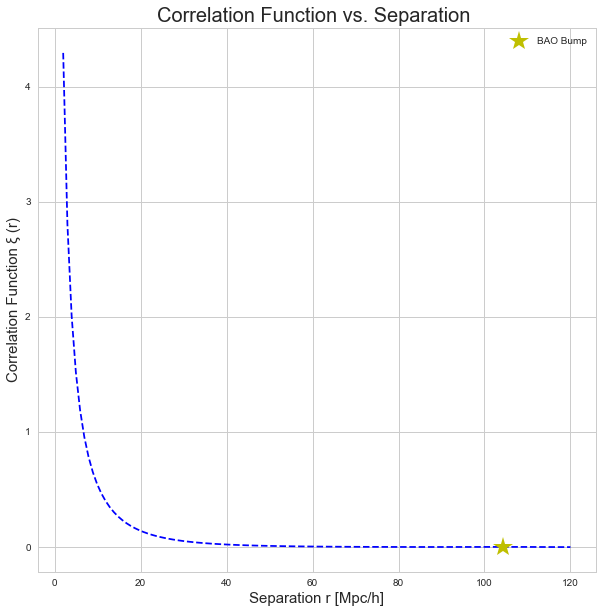

In [213]:
plt.figure(figsize=(10,10))

corrs = np.array(corrs)
corrs80 = corrs[rs>80]
rs80 = rs[rs>80]
plt.plot(rs,corrs,'b--')
plt.plot(rs80[corrs80.argmax()],corrs80[corrs80.argmax()],'y*',markersize = 20,label = 'BAO Bump')
plt.xlabel("Separation r [Mpc/h]",fontsize = 15)
plt.ylabel('Correlation Function ξ (r)',fontsize = 15)
plt.title("Correlation Function vs. Separation ",fontsize = 20)
plt.legend()

In [205]:
rs80[26]

106.23333333333333

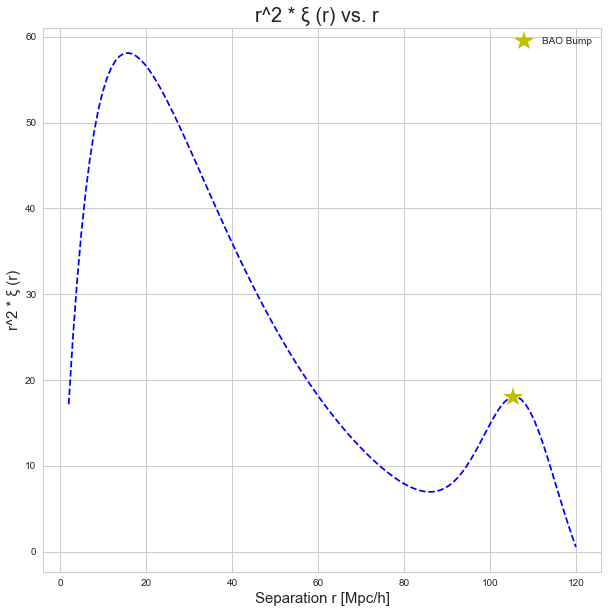

In [214]:
plt.figure(figsize=(10,10))
r2corrs = np.multiply(np.power(rs,2),corrs)
r2corrs80 = r2corrs[rs > 80]
plt.plot(rs,r2corrs,'b--')
plt.plot(rs80[r2corrs80.argmax()],r2corrs80[r2corrs80.argmax()],'y*',markersize=20,label = 'BAO Bump')
plt.xlabel("Separation r [Mpc/h]",fontsize = 15)
plt.ylabel('r^2 * ξ (r)',fontsize = 15)
plt.title("r^2 * ξ (r) vs. r  ",fontsize = 20)
plt.legend()

In the Correlation vs Separation graph, we locate the BAO bump at approximately r = 105.25
When adjusting at r^2, this bump is at around r = 106.33.

These differences are minor and assumed negligible, and an artifact of multiplying by this scaled factor of r**2. 

In any case, we will follow with the original manifestation of this trend (and actually modeling a trend), to conclude that the BAO bump is at approximately r = 105.25 Mpc/h. 

In [163]:
#rs[rs>80]
corrs = np.array(corrs)

In [167]:
corrs80 = corrs[rs>80]
rs80 = rs[rs>80]

In [170]:
rs80[max(corrs80)

0.0016397701753959216

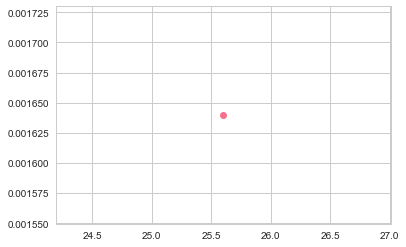

In [177]:
plt.plot(rs[corrs80.argmax()],corrs80[corrs80.argmax()],'o')

# THESE ONES LOOK RIGHT!

Text(0.5, 1.0, 'Correlation Function vs. Separation ')

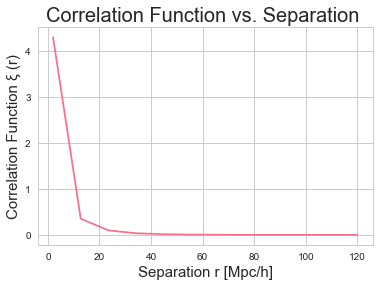

In [149]:
plt.plot(rs,corrs,'-')
plt.xlabel("Separation r [Mpc/h]",fontsize = 15)
plt.ylabel('Correlation Function ξ (r)',fontsize = 15)
plt.title("Correlation Function vs. Separation ",fontsize = 20)
#plt.xscale('symlog')

Text(0.5, 1.0, 'r^2 * Correlation Function vs. Separation ')

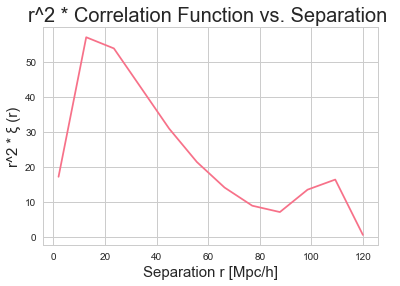

In [150]:
plt.plot(rs,np.multiply(np.power(rs,2),corrs),'-')
plt.xlabel("Separation r [Mpc/h]",fontsize = 15)
plt.ylabel('r^2 * ξ (r)',fontsize = 15)
plt.title("r^2 * Correlation Function vs. Separation ",fontsize = 20)

array([ 50. ,  53.5,  57. ,  60.5,  64. ,  67.5,  71. ,  74.5,  78. ,
        81.5,  85. ,  88.5,  92. ,  95.5,  99. , 102.5, 106. , 109.5,
       113. , 116.5, 120. ])